In [1]:
from PIL import Image
import glob
import os.path as osp
import pandas as pd
from pathlib import Path
import datetime
import matplotlib.pyplot as plt
import re

In [2]:
#img_dir = r'C:\Projects\others\stable diff AF\stable-diffusion-webui-AF\outputs\txt2img-images'
img_dir = r'D:\Projects\image_generation\animefest AI original'

In [3]:
all_images = glob.glob(osp.join(img_dir, r'**\*.png'))
len(all_images)

1814

In [4]:
filename = all_images[0]
im = Image.open(filename)
im.load()  # Needed only for .png EXIF data (see citation above)
im.info['parameters'].split('\n')[0]

'((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), 1girl'

In [5]:
osp.getmtime(filename)

1683280626.2309437

In [6]:
datetime.datetime.fromtimestamp(osp.getmtime(filename))

datetime.datetime(2023, 5, 5, 11, 57, 6, 230944)

In [7]:
image_names = [osp.split(i)[0][-2:]+'/'+osp.split(i)[1] for i in all_images]
image_names[:5]

['05/00000-3984452859.png',
 '05/00001-3984452860.png',
 '05/00002-3984452861.png',
 '05/00003-3984452862.png',
 '05/00004-1497326106.png']

In [8]:
image_paths = [Path(i) for i in all_images]
image_paths[:5]

[WindowsPath('D:/Projects/image_generation/animefest AI original/2023-05-05/00000-3984452859.png'),
 WindowsPath('D:/Projects/image_generation/animefest AI original/2023-05-05/00001-3984452860.png'),
 WindowsPath('D:/Projects/image_generation/animefest AI original/2023-05-05/00002-3984452861.png'),
 WindowsPath('D:/Projects/image_generation/animefest AI original/2023-05-05/00003-3984452862.png'),
 WindowsPath('D:/Projects/image_generation/animefest AI original/2023-05-05/00004-1497326106.png')]

In [9]:
image_prompts = []
for i in all_images:
    im = Image.open(i)
    im.load()  # Needed only for .png EXIF data (see citation above)
    image_prompts.append(im.info['parameters'].split('\n')[0])

In [10]:
image_dates = [datetime.datetime.fromtimestamp(osp.getmtime(i)) for i in all_images]

In [11]:
df = pd.DataFrame(data={'name': image_names, 'prompt': image_prompts, 'created': image_dates})
df

,name,prompt,created
0,05/00000-3984452859.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:06.230944
1,05/00001-3984452860.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:06.311726
2,05/00002-3984452861.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:25.190799
3,05/00003-3984452862.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:25.265597
4,05/00004-1497326106.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 12:14:16.942411
...,...,...,...
1809,07/00433-318720306.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:01:29.379590
1810,07/00434-1236313520.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:02:05.016395
1811,07/00435-1236313521.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:02:05.134293
1812,07/00436-2159005431.png,Megumin in maid costume,2023-05-07 13:03:45.946393


In [12]:
unique_prompts = df['prompt'].unique()
len(unique_prompts), unique_prompts[:5]

(816,
 array(['((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), 1girl',
        'Photograph of a donkey',
        '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), 1girl, loli, petite, schoolgirl',
        '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), loli, petite, schoolgirl',
        '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), loli, petite, schoolgirl, human, standing person'],
       dtype=object))

In [13]:
df[df['prompt'].str.contains('\w,\w')]

,name,prompt,created
594,06/00387-329053753.png,"rengoku,standing,in flames",2023-05-06 15:07:22.189667
595,06/00388-329053754.png,"rengoku,standing,in flames",2023-05-06 15:07:22.305562
600,06/00393-3618108937.png,"Muzan Kibutsuji,black curly hair, white hat, r...",2023-05-06 15:11:22.554449
601,06/00394-3618108938.png,"Muzan Kibutsuji,black curly hair, white hat, r...",2023-05-06 15:11:22.642744
604,06/00397-3877016343.png,"Michael Jackson,black curly hair,singing,moonw...",2023-05-06 15:13:37.514172
605,06/00398-3877016344.png,"Michael Jackson,black curly hair,singing,moonw...",2023-05-06 15:13:37.590384
606,06/00399-4199443699.png,"Michael Jackson,black curly hair,singing,",2023-05-06 15:14:32.237536
607,06/00400-4199443700.png,"Michael Jackson,black curly hair,singing,",2023-05-06 15:14:32.305580
787,06/00580-310295830.png,"(kenku,Raven) dnd character , barbarian ,giant...",2023-05-06 16:47:01.053032
788,06/00581-310295831.png,"(kenku,Raven) dnd character , barbarian ,giant...",2023-05-06 16:47:01.161563


In [14]:
prompt_phrases = df['prompt'].str.split(',')
prompt_words = df['prompt'].str.replace('(','').str.replace(')','').str.split(r'[,\s]', regex=True)
all_prompt_phrases = prompt_phrases.explode().str.strip()
all_prompt_words = prompt_words.explode().str.strip()
all_prompt_phrases, all_prompt_words

C:\Users\Azathoth\AppData\Local\Temp\ipykernel_34540\3052075350.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  prompt_words = df['prompt'].str.replace('(','').str.replace(')','').str.split(r'[,\s]', regex=True)


(0               ((masterpiece))
 0                (best quality)
 0              (ultra-detailed)
 0           (best illustration)
 0                 (best shadow)
                  ...           
 1811           (ultra-detailed)
 1811        (best illustration)
 1811             big brain time
 1812    Megumin in maid costume
 1813    Megumin in maid costume
 Name: prompt, Length: 8092, dtype: object,
 0       masterpiece
 0                  
 0              best
 0           quality
 0                  
            ...     
 1812        costume
 1813        Megumin
 1813             in
 1813           maid
 1813        costume
 Name: prompt, Length: 24524, dtype: object)

In [15]:
df['phrase_len'] = prompt_phrases.apply(len)
df['word_len'] = prompt_words.apply(len)

In [16]:
unique_words = all_prompt_words.unique()
len(unique_words), unique_words

(1362,
 array(['masterpiece', '', 'best', ..., 'windy', 'brain', 'Megumin'],
       dtype=object))

In [17]:
created_times = df.resample('1H', on='created').count()
created_times[:5]

,name,prompt,phrase_len,word_len
created,,,,
2023-05-05 11:00:00,4,4,4,4
2023-05-05 12:00:00,32,32,32,32
2023-05-05 13:00:00,28,28,28,28
2023-05-05 14:00:00,6,6,6,6
2023-05-05 15:00:00,2,2,2,2


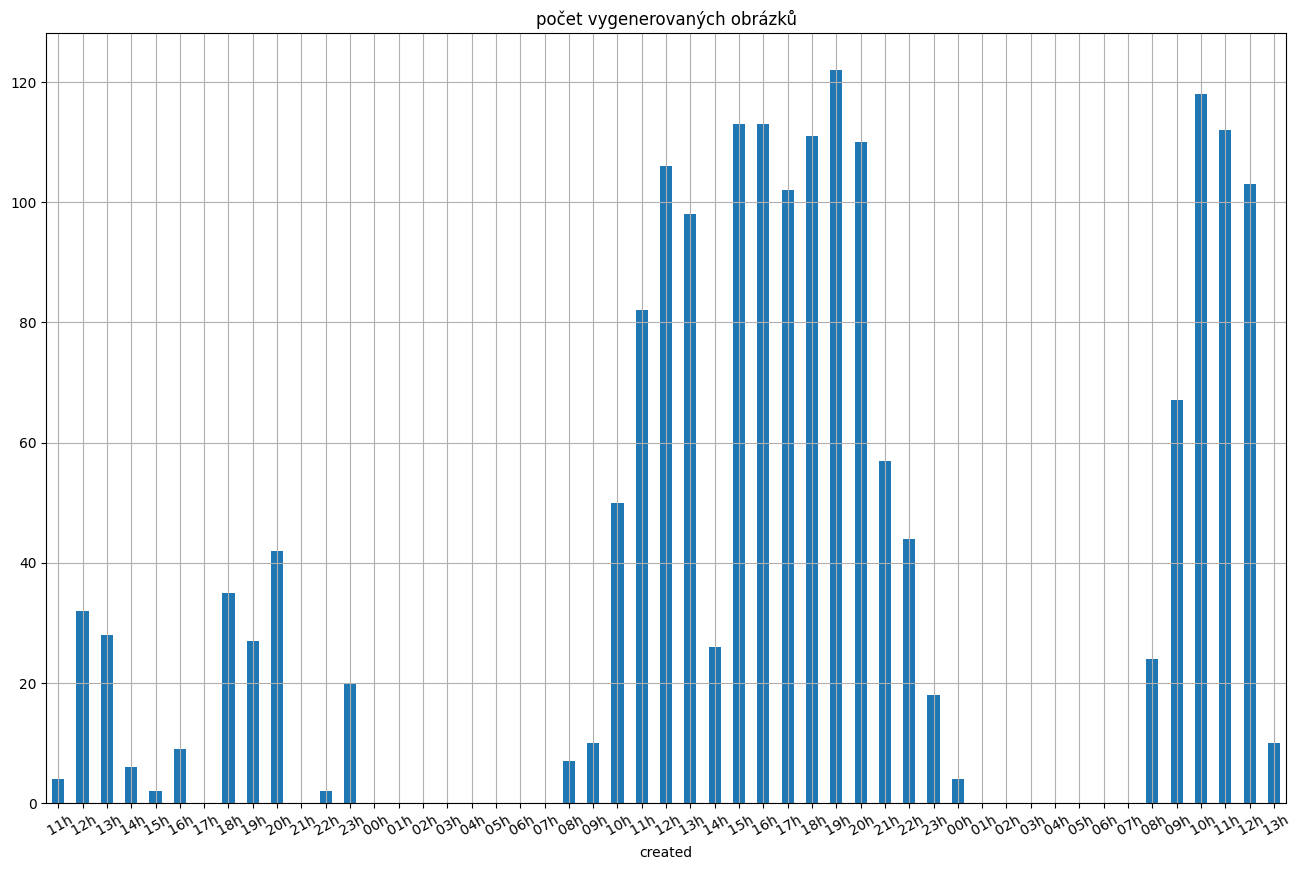

In [18]:
from matplotlib.dates import HourLocator, DateFormatter
created_times['name'].plot(kind='bar', figsize=(16, 10), linewidth=1.3)
ax = plt.gca()
labels = ax.get_xticklabels()
[i.set_text(re.sub('2023-05-0\d','', i.get_text()).replace(':00:00', 'h')) for i in labels]
ax.set_xticklabels(labels)
plt.xticks(rotation=30)
plt.grid()
plt.title('počet vygenerovaných obrázků')
None

In [19]:
df

,name,prompt,created,phrase_len,word_len
0,05/00000-3984452859.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:06.230944,6,14
1,05/00001-3984452860.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:06.311726,6,14
2,05/00002-3984452861.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:25.190799,6,14
3,05/00003-3984452862.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 11:57:25.265597,6,14
4,05/00004-1497326106.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-05 12:14:16.942411,6,14
...,...,...,...,...,...
1809,07/00433-318720306.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:01:29.379590,13,30
1810,07/00434-1236313520.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:02:05.016395,5,13
1811,07/00435-1236313521.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-07 13:02:05.134293,5,13
1812,07/00436-2159005431.png,Megumin in maid costume,2023-05-07 13:03:45.946393,1,4


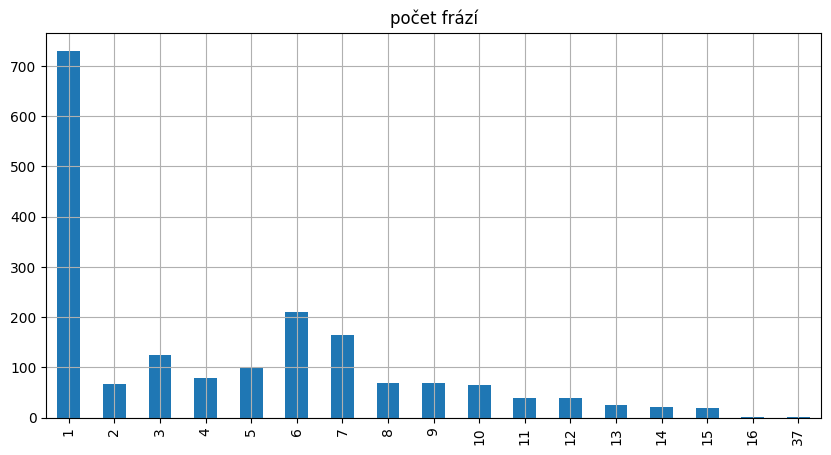

In [20]:
df['phrase_len'].value_counts().sort_index().plot(kind='bar',title='počet frází', figsize=(10, 5))
plt.grid()

In [21]:
df[df['phrase_len'] == 1]

,name,prompt,created,phrase_len,word_len
8,05/00008-1037996099.png,Photograph of a donkey,2023-05-05 12:17:15.521357,1,4
9,05/00009-4073198834.png,Photograph of a donkey,2023-05-05 12:18:20.997473,1,4
22,05/00022-3699371195.png,Photograph of a donkey,2023-05-05 12:30:47.874629,1,4
31,05/00031-3091251733.png,Photograph of a donkey,2023-05-05 12:35:23.433278,1,4
32,05/00032-2673056414.png,Photograph of a donkey,2023-05-05 12:35:46.660172,1,4
...,...,...,...,...,...
1783,07/00407-836376087.png,me like angel,2023-05-07 12:50:29.414711,1,3
1784,07/00408-836376088.png,me like angel,2023-05-07 12:50:29.495863,1,3
1785,07/00409-1087639940.png,Photograph of a donkey,2023-05-07 12:52:07.983054,1,4
1812,07/00436-2159005431.png,Megumin in maid costume,2023-05-07 13:03:45.946393,1,4


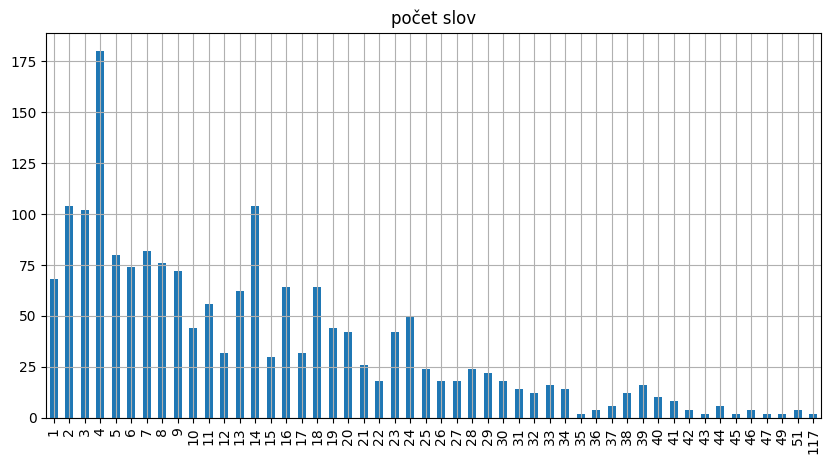

In [22]:
df['word_len'].value_counts().sort_index().plot(kind='bar',title='počet slov', figsize=(10, 5))
plt.grid()

In [23]:
df[df['word_len'] == 1]

,name,prompt,created,phrase_len,word_len
44,05/00044-826513304.png,donkey,2023-05-05 13:11:03.156730,1,1
45,05/00045-826513305.png,donkey,2023-05-05 13:11:03.224549,1,1
107,05/00107-641990775.png,monkey,2023-05-05 18:53:41.703878,1,1
108,05/00108-641990776.png,monkey,2023-05-05 18:53:41.801018,1,1
109,05/00109-3341528697.png,totoro,2023-05-05 18:57:21.623872,1,1
...,...,...,...,...,...
1775,07/00399-3655828742.png,Nico-robin,2023-05-07 12:46:49.562100,1,1
1778,07/00402-491179719.png,deku,2023-05-07 12:48:05.214817,1,1
1779,07/00403-491179720.png,deku,2023-05-07 12:48:05.308233,1,1
1780,07/00404-1113024838.png,dickbutt,2023-05-07 12:49:19.846611,1,1


In [24]:
df[df['phrase_len'] == df['phrase_len'].max()]

,name,prompt,created,phrase_len,word_len
34,05/00034-3316156632.png,"Dystopian, [sci-fi], High Detail RAW color Pho...",2023-05-05 12:41:36.155874,37,117
35,05/00035-3316156633.png,"Dystopian, [sci-fi], High Detail RAW color Pho...",2023-05-05 12:41:36.274583,37,117


In [25]:
df[df['phrase_len'] == df['phrase_len'].max()]['prompt'].to_numpy()

array(['Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (detailed skin, diffused skin pores), silicone, metal, (highly detailed, fine details, intricate), (lens flare:0.5)::(bloom:0.5), smog, dust, (badlands:0.8), (observitory:0.7), raytracing, specular lighting, shallow depth of field, photographed on a Canon EOS 5D, 75mm lens, f/2.8, hard focus, smooth, cinematic film still from Blade Runner 2049, [Cyberpunk:Orwelian:45]',
       'Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (de

In [26]:
df[df['word_len'] == df['word_len'].max()]['prompt'].to_numpy()

array(['Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (detailed skin, diffused skin pores), silicone, metal, (highly detailed, fine details, intricate), (lens flare:0.5)::(bloom:0.5), smog, dust, (badlands:0.8), (observitory:0.7), raytracing, specular lighting, shallow depth of field, photographed on a Canon EOS 5D, 75mm lens, f/2.8, hard focus, smooth, cinematic film still from Blade Runner 2049, [Cyberpunk:Orwelian:45]',
       'Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (de

In [27]:
df[df['phrase_len'] == 16]

,name,prompt,created,phrase_len,word_len
484,06/00277-4137095824.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-06 13:12:49.019672,16,41
485,06/00278-4137095825.png,"((masterpiece)), (best quality), (ultra-detail...",2023-05-06 13:12:49.103873,16,41


In [28]:
df[df['phrase_len'] == 16]['prompt'].to_numpy()

array(['((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), 1girl, nature, blue sky, fluffy clouds, redhair, blue eyes, white dress, cat ears, full body, sitting, green trees',
       '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), 1girl, nature, blue sky, fluffy clouds, redhair, blue eyes, white dress, cat ears, full body, sitting, green trees'],
      dtype=object)

In [29]:
df[df['word_len'] == 51]

,name,prompt,created,phrase_len,word_len
1798,07/00422-183432441.png,"L from death note, nice looking, is holding an...",2023-05-07 12:57:25.635709,15,51
1799,07/00423-183432442.png,"L from death note, nice looking, is holding an...",2023-05-07 12:57:25.745905,15,51
1800,07/00424-976030173.png,"L from death note, nice looking, is holding an...",2023-05-07 12:57:57.369705,15,51
1801,07/00425-976030174.png,"L from death note, nice looking, is holding an...",2023-05-07 12:57:57.459907,15,51


In [30]:
df[df['word_len'] == 51]['prompt'].to_numpy()

array(['L from death note, nice looking, is holding an (((apple in his right hand))), is smiling, (((white hair))),detailed face, 4k, Octane render, artstation, mucha, ultra detail, is wearing a simple white shirt, ((whole body shot)), (((t-shirt))), ',
       'L from death note, nice looking, is holding an (((apple in his right hand))), is smiling, (((white hair))),detailed face, 4k, Octane render, artstation, mucha, ultra detail, is wearing a simple white shirt, ((whole body shot)), (((t-shirt))), ',
       'L from death note, nice looking, is holding an (((apple in his right hand))), is smiling, (((white hair))),detailed face, 4k, Octane render, artstation, mucha, ultra detail, is wearing a simple white shirt, ((whole body shot)), (((t-shirt))), ',
       'L from death note, nice looking, is holding an (((apple in his right hand))), is smiling, (((white hair))),detailed face, 4k, Octane render, artstation, mucha, ultra detail, is wearing a simple white shirt, ((whole body shot)), ((

In [31]:
all_prompt_phrases.value_counts()[:60]

((masterpiece))                                                    576
(best quality)                                                     514
(ultra-detailed)                                                   502
(best illustration)                                                468
(best shadow)                                                      294
1girl                                                              234
best quality                                                        98
masterpiece                                                         98
Photograph of a donkey                                              84
(ultra quality)                                                     72
(high quality)                                                      70
photorealistic                                                      62
                                                                    60
tall                                                                46
medium

In [32]:
all_prompt_words.value_counts()[:60]

                  6398
best              1394
quality            814
masterpiece        774
ultra-detailed     544
illustration       468
hair               390
shadow             326
long               266
in                 262
purple             250
1girl              244
with               232
a                  210
on                 188
girl               188
black              186
and                156
white              150
anime              140
high               138
eyes               136
blue               132
of                 130
red                114
kimono             106
green              104
fox                 94
donkey              92
the                 90
ultra               88
Photograph          84
from                82
photorealistic      80
short               74
tail                74
shirt               72
face                68
dress               62
detailed            60
stockings           60
light               60
yellow              58
wolf       

# blacklist log

In [33]:
#blacklist_log = r'C:\Projects\others\stable diff AF\stable-diffusion-webui-AF\Defender.log'
blacklist_log = r'W:\other\software\AF2023\Defender.log'
with open(blacklist_log, 'r', encoding='ansi') as f:
    blacklist_logs = f.read().split('\n')
blacklist_logs[:5], len(blacklist_logs)

(['2023-05-05 12:17:01,754:INFO:BLACKLIST: ((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), sex, porn, coitus, naked people',
  '2023-05-05 12:18:07,315:INFO:BLACKLIST: ((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), loli, petite, schoolgirl',
  '2023-05-05 12:30:32,935:INFO:BLACKLIST: ((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), girl, kimono,  violet, animefest, mascot',
  '2023-05-05 12:35:10,029:INFO:BLACKLIST: Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, large ass, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (detailed skin, diffused skin pores), silicone, metal, (highly detailed, fine details, intricate), (lens flare:0.5)::(bloom:0.5), smog, dust, (badla

In [34]:
hit_words = [re.sub(r'[\d\w\- :,]+BLACKLIST WORD HIT: ', '', i) for i in blacklist_logs if 'BLACKLIST WORD HIT: ' in i]
hit_words

['see-through',
 'love',
 'feet',
 'furry',
 'fur',
 'uke',
 'love',
 'penis',
 'anus',
 'anus',
 'pregnant',
 'sex',
 'hetero',
 'futa',
 'ass',
 'ass',
 'veil',
 'ass',
 'ass',
 'ass',
 'ass',
 'ass',
 'tits',
 'breasts',
 'boob',
 'boob',
 'boob',
 'sex',
 'shirtless',
 'shirtless',
 'shirtless',
 'shirtless',
 'sex',
 'ass',
 'ass',
 'ass',
 'ass',
 'ass',
 'ass',
 'furry',
 'fur',
 'furry',
 'fur',
 'yaoi',
 'yaoi',
 'love',
 'yaoi',
 'yaoi',
 'yaoi',
 'love',
 'ass',
 'ass',
 'gay',
 'yaoi',
 'fur',
 'ass',
 'ass',
 'ass',
 'ass',
 'love',
 'love',
 'love',
 'fur',
 ' ass',
 ' ass',
 ',ass',
 '[ass',
 'love',
 'love',
 'love',
 'tits',
 'sex',
 'ass ',
 'ass ',
 'ass ',
 'ass ',
 'gay',
 'love',
 'furry',
 'nude',
 'nude',
 'nude',
 'trans',
 'trans',
 'trans',
 'gay',
 'sex']

In [35]:
bl_words = pd.Series(hit_words)
bl_words.value_counts()

ass            19
love           11
yaoi            6
fur             5
sex             5
furry           4
ass             4
shirtless       4
trans           3
gay             3
boob            3
nude            3
 ass            2
anus            2
tits            2
[ass            1
,ass            1
see-through     1
breasts         1
futa            1
hetero          1
pregnant        1
penis           1
uke             1
feet            1
veil            1
dtype: int64

In [36]:
hit_prompts = [re.sub(r'[\d\w\- :,]+BLACKLIST: ', '', i) for i in blacklist_logs if 'BLACKLIST: ' in i]
hit_prompts

['((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), sex, porn, coitus, naked people',
 '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), loli, petite, schoolgirl',
 '((masterpiece)), (best quality), (ultra-detailed), (best illustration), (best shadow), girl, kimono,  violet, animefest, mascot',
 'Dystopian, [sci-fi], High Detail RAW color Photo, Full Shot, ((cute female arterial intelligence, wearing see-through white chemise), outdoors, standing, on overlook, looking out at sprawling cyberpunk city skyline), toned physique, large ass, (pale skin), (cybernetic implants:1.2), (augmentations), (cyborg:1.1), (detailed skin, diffused skin pores), silicone, metal, (highly detailed, fine details, intricate), (lens flare:0.5)::(bloom:0.5), smog, dust, (badlands:0.8), (observitory:0.7), raytracing, specular lighting, shallow depth of field, photographed on a Canon EOS 5D, 75mm lens, f/2.8, hard focus, smooth, cinematic 

In [37]:
unique_prompt_out = 'unique_prompts.txt'
unique_prompts.sort()
with open(unique_prompt_out, 'w', encoding='utf-8') as f:
    for i in unique_prompts:
        f.write(f'{i}\n')